("C" exercise) Perform a regression on the dataset stored in FTML/Project/data/regression/.
You are free to choose the regression methods, but you must compare at least two
methods. You can do more than 2 but this is not mandatory for this exercise. Dis-
cuss the choice of the optimization procedures, solvers, hyperparameters, cross-
validation, etc. The Bayes estimator for this dataset and the squared loss reaches
a R2 score of approximately 0.92. Your objective should be to obtain a R2 score
superior than 0.88 on the test set (that must not be used during training).


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing, linear_model
from sklearn.tree import DecisionTreeRegressor



In [3]:
X_test = np.load('../data/Regression_datasets_ex4/X_test.npy')
y_test = np.load('../data/Regression_datasets_ex4/y_test.npy')

X_train = np.load('../data/Regression_datasets_ex4/X_train.npy')
y_train = np.load('../data/Regression_datasets_ex4/y_train.npy')

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (200, 200)
Shape of y_train: (200, 1)
Shape of X_test: (200, 200)
Shape of y_test: (200, 1)


Let's make a bit (just one cell) of data visualization !

Feature 0: [5.23084342]
Feature 20: [4.39168619]
Feature 40: [4.67643549]
Feature 60: [4.6349447]
Feature 80: [6.71870483]
Feature 100: [3.41926963]
Feature 120: [5.0919934]
Feature 140: [5.07501331]
Feature 160: [5.24250855]
Feature 180: [5.92129981]


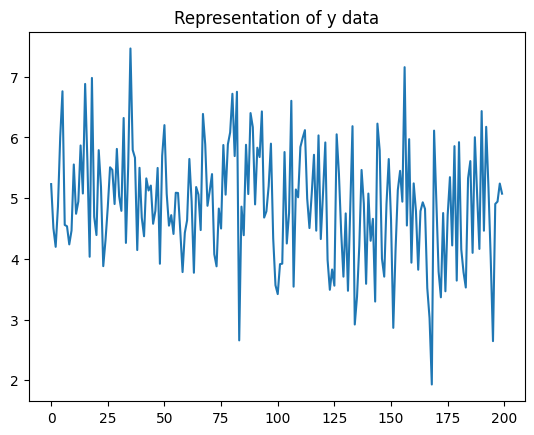

In [4]:
for i in range (0, y_train.shape[0],  20):
    print(f"Feature {i}: {y_train[i]}")
# Plot the representation of the y data
plt.figure()
plt.plot(y_train)
plt.title("Representation of y data")
plt.show()

In the following cells the link refers to the official documentation of models.
They are meant for us so we can quickly look at them

In [5]:
y_test = y_test.ravel() # Avoiding warning
y_train = y_train.ravel() # Avoiding warning

# Function to evaluate and print model performance
def evaluate_model(model, see_some_outputs = 0, name=None):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    if name:
        print(f"Model: {name}, R2 Score: {r2:.4f}")
    else:
        print(f"Model: {model.__class__.__name__}, R2 Score: {r2:.4f}")
    #print(f"R2 Score: {r2:.4f}")
    for i in range(see_some_outputs):
        print(f"Actual value: {y_test[i]:.4f} Predicted value: {y_pred[i]:.4f}")
    return r2

# Linear Regression
classical_linear_model = LinearRegression()
evaluate_model(classical_linear_model)
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

# Ridge Regression
ridge = Ridge(alpha=1) # default alpha=1
evaluate_model(ridge)
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge

# Lasso Regression
lasso = Lasso(alpha=1) # default alpha=1
evaluate_model(lasso)
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html#sklearn.linear_model.Lasso

# Decision Tree Regressor
tree = DecisionTreeRegressor(max_depth=5)
evaluate_model(tree)
#https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor

# Bayesian Ridge Regression
from sklearn import linear_model as lm
bayesianRidge = lm.BayesianRidge()
evaluate_model(bayesianRidge)
#https://scikit-learn.org/stable/modules/linear_model.html#bayesian-ridge-regression

# Tweedie Regression
from sklearn.linear_model import TweedieRegressor
tweedieRegressor = TweedieRegressor(power=1, alpha=0.5, link='log')
evaluate_model(tweedieRegressor)
#https://scikit-learn.org/stable/modules/linear_model.html#usage

# SGD Regressor
SGDRegressor = lm.SGDRegressor()
evaluate_model(SGDRegressor)
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html#sklearn.linear_model.SGDRegressor

Model: LinearRegression, R2 Score: -14.0151
Model: Ridge, R2 Score: 0.7161
Model: Lasso, R2 Score: -0.0339
Model: DecisionTreeRegressor, R2 Score: -0.1764
Model: BayesianRidge, R2 Score: 0.7163
Model: TweedieRegressor, R2 Score: 0.4168
Model: SGDRegressor, R2 Score: 0.5319


0.5319362503968165

Let's try the same models but using GridSearch with Cross Validation to find the best HP.

In [6]:
# Ridge Regression with hyperparameter tuning
ridge = Ridge()
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}
ridge_cv = GridSearchCV(ridge, param_grid, cv=5)
evaluate_model(ridge_cv, 0, "Ridge")
print(f"Best Ridge alpha: {ridge_cv.best_params_['alpha']}")

# Decision Tree Regression with hyperparameter tuning
tree = DecisionTreeRegressor()
param_grid = {'max_depth': [2, 4, 6, 8, 10]}
tree_cv = GridSearchCV(tree, param_grid, cv=5)
evaluate_model(tree_cv, 0, "DecisionTree")
print(f"Best Decision Tree max_depth: {tree_cv.best_params_['max_depth']}")

lasso = Lasso()
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}
lasso_cv = GridSearchCV(lasso, param_grid, cv=5)
evaluate_model(lasso_cv, 0, "Lasso")
print(f"Best Lasso alpha: {lasso_cv.best_params_['alpha']}")

# Bayesian Ridge Regression with hyperparameter tuning
bayesianRidge = lm.BayesianRidge()
param_grid = {'max_iter': [100, 300, 500, 1000, 1500]}
bayesianRidge_cv = GridSearchCV(bayesianRidge, param_grid, cv=5)
evaluate_model(bayesianRidge_cv, 0, "Bayesain Ridge")
print(f"Best Bayesian Ridge n_iter: {bayesianRidge_cv.best_params_['max_iter']}")

# Cross-Validation Scores
linear_scores = cross_val_score(classical_linear_model, X_train, y_train, cv=5)
ridge_scores = cross_val_score(ridge_cv.best_estimator_, X_train, y_train, cv=5)
tree_scores = cross_val_score(tree_cv.best_estimator_, X_train, y_train, cv=5)
lasso_scores = cross_val_score(lasso_cv.best_estimator_, X_train, y_train, cv=5)
bayesianRidge_scores = cross_val_score(bayesianRidge_cv.best_estimator_, X_train, y_train, cv=5)

print(f"Linear Regression CV R2 Scores: {linear_scores}")
print(f"Ridge Regression CV R2 Scores: {ridge_scores}")
print(f"Decision Tree Regression CV R2 Scores: {tree_scores}")
print(f"Lasso Regression CV R2 Scores: {lasso_scores}")
print(f"Bayesian Ridge Regression CV R2 Scores: {bayesianRidge_scores}")

Model: Ridge, R2 Score: 0.7161
Best Ridge alpha: 1
Model: DecisionTree, R2 Score: -0.0542
Best Decision Tree max_depth: 2
Model: Lasso, R2 Score: 0.9189
Best Lasso alpha: 0.01
Model: Bayesain Ridge, R2 Score: 0.7163
Best Bayesian Ridge n_iter: 100
Linear Regression CV R2 Scores: [0.38099785 0.25365881 0.61238242 0.65116345 0.33585295]
Ridge Regression CV R2 Scores: [0.46480078 0.4135837  0.75429283 0.72508565 0.49955819]
Decision Tree Regression CV R2 Scores: [ 0.02817523 -0.66592378 -0.15752226 -0.34439323 -0.04860154]
Lasso Regression CV R2 Scores: [0.89366338 0.92248241 0.92739919 0.93124428 0.9205853 ]
Bayesian Ridge Regression CV R2 Scores: [0.48285649 0.41299682 0.74109975 0.71896399 0.4763207 ]


In [7]:
# The best estimator is the one with the highest R2 score
best_estimator = max([classical_linear_model, ridge_cv.best_estimator_, tree_cv.best_estimator_, lasso_cv.best_estimator_, bayesianRidge_cv.best_estimator_], key=lambda x: evaluate_model(x))
print(f"Best Estimator: {best_estimator.__class__.__name__}")


Model: LinearRegression, R2 Score: -14.0151
Model: Ridge, R2 Score: 0.7161
Model: DecisionTreeRegressor, R2 Score: -0.0542
Model: Lasso, R2 Score: 0.9189
Model: BayesianRidge, R2 Score: 0.7163
Best Estimator: Lasso


We found it !
The Bayes estimator for this dataset is Lasso with an alpha=0.01.
It's R2 score is around 0.92.